### Week3 An in depth example - Linear Regression example
https://youtu.be/c-2CN1WR5v8

In [2]:
import tensorflow as tf 

import numpy as np 
import matplotlib.pyplot as plt 
from IPython import display

plt.style.use('ggplot')
np.random.seed(0)

### Create some data to play with

In [3]:
# create N data points
N = 50

xdata = np.linspace(0, 5, N) # create 50 equally spaced points

beta0=2  #intercept
beta1=2  #slope
epsilon = 1   #scaling factor
ydata= beta0 + beta1*xdata + epsilon*np.random.normal(size=N)  #line with some noise added to it


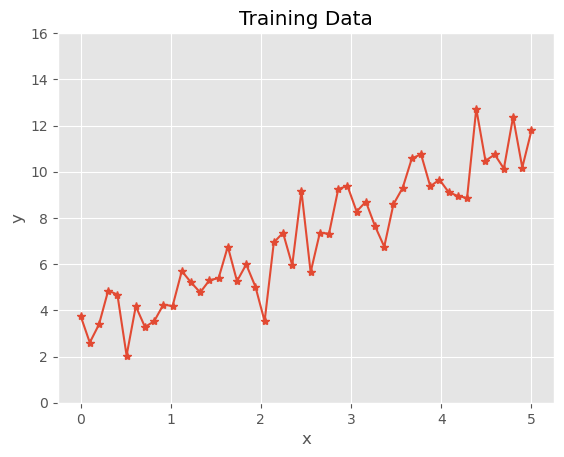

In [4]:
# Plot of Training Data 
plt.plot(xdata, ydata,'*-') 
plt.xlabel('x') 
plt.ylabel('y') 
plt.ylim(0,16)
plt.title("Training Data") 
plt.show() 


### Use TensorFlow to perform linear regression, assuming the relationship between $x$ and $y$ is
$y = \beta_0 + \beta_1 x + \epsilon$

### Create the variables we're going to train



In [ ]:
b0 = tf.Variable(0.4)   #randomly initialised
b1 = tf.Variable(0.1)   #randomly initialised

### Define our statistical model

In [ ]:
def LinearModel(x):
   return tf.add(tf.multiply(x, b1), b0)

### Define our loss function as the mean of the squared differences between the observed $y$ and the prediction

In [8]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)  #used to udpate the weights

#mean squared error
def loss(y, pred):
    return tf.reduce_mean(tf.square(y - pred))    #reduced_mean as they are vectors and we need a single value

### Set up Tensorflow training loop

In [9]:
#We create a tape and record computations inside that tape
def train(x, y):   #x is data, y is predictions
    with tf.GradientTape() as tape:
        predicted = LinearModel(x)   
        current_loss = loss(y, predicted)
        gradients = tape.gradient(current_loss, [b1, b0])  # compute gradients (we would use a list even if it was one variable)
        optimizer.apply_gradients(zip(gradients, [b1 ,b0]))  #use optimizer to udpate the weights
    return b1, b0, predicted, current_loss

### Use the training loop to train on the dataset

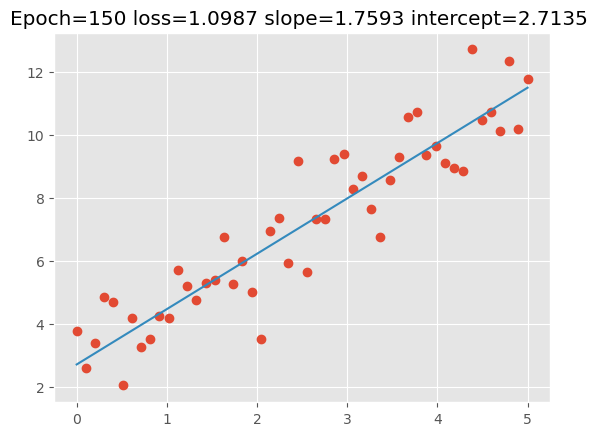

In [10]:
epochs = range(150)  #one epoch is one iteration of passing the entire data through the model
# vary the epoch to see how it changes the results

for epoch in epochs:

  slope, intercept, pred, training_loss = train(xdata, ydata)

  #plotting after every iteration
    plt.clf()    
  plt.plot(xdata, ydata, 'o', label ='Original data') 
  plt.plot(xdata, pred, label ='Fitted line') 
  #plt.title('Epoch {} loss {:.4f} slope {:.4f} intercept {:.4f} '.format((epoch + 1), training_loss, slope, intercept))
  plt.title('Epoch=%3d loss=%.4f slope=%.4f intercept=%.4f ' % ((epoch + 1), training_loss, slope, intercept))
  
  display.display(plt.gcf())
  display.clear_output(wait=True)

In [11]:
# Calculating the predictions of final model
predictions = slope * xdata + intercept 
print("Training loss =", training_loss, "slope =", slope, "intercept =", intercept, '\n') 

Training loss = tf.Tensor(1.0987171, shape=(), dtype=float32) slope = <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.7592812> intercept = <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.713461> 



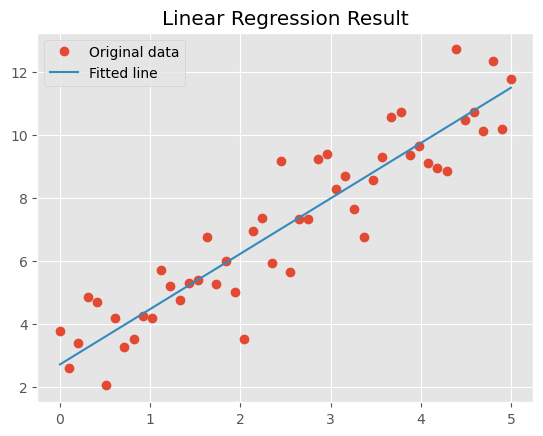

In [12]:
# Plotting the Results 
plt.plot(xdata, ydata, 'o', label ='Original data') 
plt.plot(xdata, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
#plt.axis([-10,110,0,250])
plt.show() 